### Classification
    Examples of classification problems are things like: 
    
        - identifying email as Spam or Not Spam 
        - determining if a tumor is malignant or benign.
        
       In particular, these are examples of "binary classification" where there are two possible outcomes. 
       
       Outcomes can be described in pairs of 'positive'/'negative' such as 'yes'/'no, 'true'/'false' or '1'/'0'.
        
       Plots of classification data sets often use symbols to indicate the outcome of an example. In the plots below, 'X' is used to represent the positive values while 'O' represents negative outcomes.

In [4]:
#simple classification
import numpy as np
import matplotlib.pyplot as plt
dlc = dict(dlblue = '#0096ff', dlorange = '#FF9300', dldarkred='#C00000', dlmagenta='#FF40FF', dlpurple='#7030A0')

x_train = np.array([0., 1, 2, 3, 4, 5])
y_train = np.array([0,  0, 0, 1, 1, 1])
x_train2 = np.array([
    [0.5, 1.5],
    [1,1],
    [1.5, 0.5],
    [3, 0.5],
    [2, 2],
    [1, 2.5]])
y_train2 = np.array([0, 0, 0, 1, 1, 1])


def plot_data(X, y, ax, pos_label="y=1", neg_label="y=0", s=80, loc='best'):
    """
    Plotting the classification data of two variables
    """
    pos = y == 1
    neg = y == 0
    pos = pos.reshape(-1,)  #work with 1D or 1D y vectors
    neg = neg.reshape(-1,)
    ax.scatter(X[pos, 0], X[pos, 1], label=pos_label, c='r', marker='x', s=s, lw=3) #x1 on x axis, x2 on y axis for pos
    ax.scatter(X[neg, 0], X[neg, 1], label=neg_label, marker='o',
               s=s, facecolors='none', edgecolors=dlc['dlblue'], lw=3) #x1 on x axis, x2 on y axis for neg
    
    ax.legend(loc=loc)
    ax.figure.canvas.toolbar_visible = False
    ax.figure.canvas.header_visible = False
    ax.figure.canvas.footer_visible = False

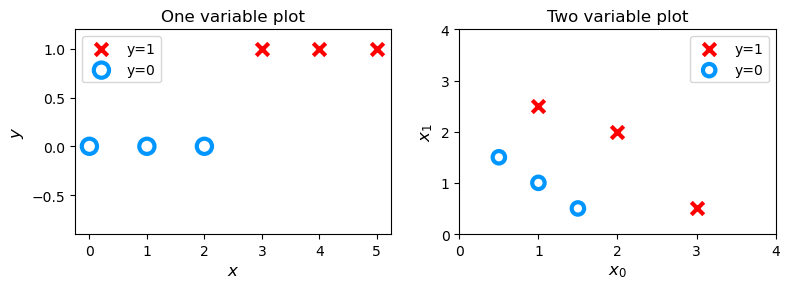

In [25]:
#plotting the classification data of single variable x
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

#getting the indexes of positive and negative examples
pos = y_train==1
neg = y_train==0

axes[0].scatter(x_train[pos], y_train[pos], label="y=1", c='r', marker='x', s=80, lw=3)
axes[0].scatter(x_train[neg], y_train[neg], label="y=0", marker='o', s=120, facecolors='none', edgecolors=dlc['dlblue'], lw=3)
axes[0].legend()
axes[0].set_ylim(-0.90, 1.2); axes[0].set_xlabel(r"$x$", fontsize=12); axes[0].set_ylabel(r"$y$", fontsize=12)
axes[0].set_title("One variable plot")

#plot classification data with 2 variables i.e 2 dimensions
plot_data(x_train2, y_train2, axes[1])
axes[1].axis([0, 4, 0, 4])
axes[1].set_xlabel(r"$x_0$", fontsize=12); axes[1].set_ylabel(r"$x_1$", fontsize=12)
axes[1].set_title("Two variable plot")
plt.tight_layout()
plt.show()

    Note in the plots above:
    --------------------------
        In the single variable plot, positive results are shown both a red 'X's and as y=1. Negative results are blue 'O's and are located at y=0.
        
        Recall in the case of linear regression, y would not have been limited to two values but could have been any value.
   
       In the two-variable plot, the y value is not available on y axis instead the plot is drawn between features based on negative and positive indexes from target y. Positive results are shown as red 'X's, while negative results use the blue 'O' symbol.
    
        Recall in the case of linear regression with multiple variables, y would not have been limited to two values and a similar plot would have been three-dimensional.(surface plot)

###  Linear Regression approach for classification
     In the previous week, you applied linear regression to build a prediction model. Let's try that approach here using the simple example that was described in the lecture. The model will predict if a tumor is benign or malignant based on tumor size.
        
        Try the following:

            - Click on 'Run Linear Regression' to find the best linear regression model for the given data.
            - Note the resulting linear model does not match the data well.
            - One option to improve the results is to apply a threshold.

            - Tick the box on the 'Toggle 0.5 threshold' to show the predictions if a threshold is applied.
            - These predictions look good, the predictions match the data
            
    Important: Now, add further 'malignant' data points on the far right, in the large tumor size range (near 10), and re-run linear regression.
            - Now, the model predicts the larger tumor, but data point at x=3 is being incorrectly predicted!
            - To clear/renew the plot, rerun the cell containing the plot command.
            
     Reason that the linear model is insufficient to model categorical data:
     ---------------------------------------------------------------------------
     Linear regression try to fit a straight line to the data. If you do that, maybe the straight line looks like below initial plot And that's your F(x). Linear regression predicts not just the values zero and one. But all numbers between zero and one or even less than zero or greater than one. But here we want to predict categories.
     
     One thing you could try is to pick a threshold of say 0.5. So that if the model outputs a value below 0.5, then you predict why equal zero or not malignant. And if the model outputs a number equal to or greater than 0.5, then predict Y equals one or malignant. Notice that this threshold value of 0.5 intersects the best fit straight line at some point. So if you draw this vertical line from there, everything to the left ends up with a prediction of y equals zero. And everything on the right ends up with the prediction of y equals one.
     
     Now, for this particular data set it looks like linear regression could do something reasonable. 
     
     But see what happens if your dataset has one more training example. Add one training example way over on the further right. Let's also extend the horizontal axis.
     
     Notice that this training example shouldn't really change how you classify the data points. This vertical dividing line that we drew just now still makes sense as the cut off where tumors smaller than this should be classified as zero. And tumors greater than this should be classified as one. 
     
     But once you've added this extra training example on the right. The best fit line for linear regression will shift over to the right. And if you continue using the threshold of 0.5, you now notice that everything to the left of this point is predicted at zero non malignant. And everything to the right of this point is predicted to be one or malignant. 
     
     This isn't what we want because adding that example way to the right shouldn't change any of our conclusions about how to classify malignant versus benign tumors. But if you try to do this with linear regression, adding this one example which feels like it shouldn't be changing anything. It ends up with learning a much worse function for this classification problem. 
     
     Clearly, when the tumor is large, we want the algorithm to classify it as malignant. So what we just saw was linear regression causes the best fit line, when we added one more example to the right to shift over, And does the dividing line also called the decision boundary to shift over to the right. 
     
     Sometimes you get lucky and it may work but often it will not work well. Which is why we don't use linear regression  for classification. This motivates the need for a different model to do classification talks - "logistic regression" for classification.
     
     The predictions of our classification model to be between 0 and 1 since our output variable is either 0 or 1. This can be accomplished by using a "sigmoid function/logistic function" which maps all input values to values between 0 and 1.

Output()

<IPython.core.display.Javascript object>


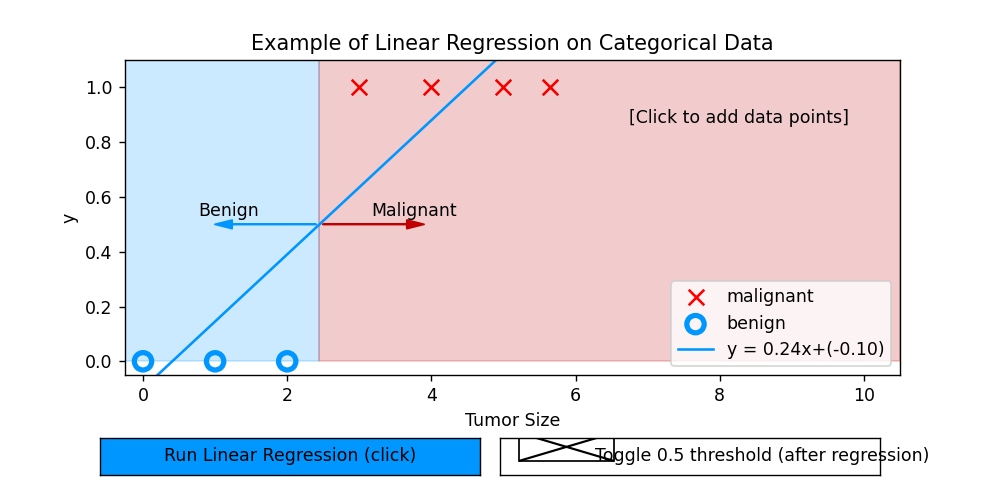

C:\Users\malla\AppData\Local\Temp\ipykernel_20912\446787621.py:312: MatplotlibDeprecationWarning: The rectangles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Any custom property styling may be lost.
  h = bcid.rectangles[0].get_height()
C:\Users\malla\AppData\Local\Temp\ipykernel_20912\446787621.py:313: MatplotlibDeprecationWarning: The rectangles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Any custom property styling may be lost.
  bcid.rectangles[0].set_height(3*h)
C:\Users\malla\AppData\Local\Temp\ipykernel_20912\446787621.py:315: MatplotlibDeprecationWarning: The rectangles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Any custom property styling may be lost.
  ymax = bcid.rectangles[0].get_bbox().y1
C:\Users\malla\AppData\Local\Temp\ipykernel_20912\446787621.py:316: MatplotlibDeprecationWarning: The rectangles attribute was deprecated in Matplotlib 3.

In [10]:
#classification data with linear regression model
import time
import copy
import math
from ipywidgets import Output
from matplotlib.widgets import Button, CheckButtons
from matplotlib.patches import FancyArrowPatch
dlc = dict(dlblue = '#0096ff', dlorange = '#FF9300', dldarkred='#C00000', dlmagenta='#FF40FF', dlpurple='#7030A0')
dlblue = '#0096ff'; dlorange = '#FF9300'; dldarkred='#C00000'; dlmagenta='#FF40FF'; dlpurple='#7030A0'
dlcolors = [dlblue, dlorange, dldarkred, dlmagenta, dlpurple]
%matplotlib notebook
# for debug
output = Output() # sends hidden error messages to display when using widgets
display(output)

def sigmoid(z):
    """
    Compute the sigmoid of z

    Parameters
    ----------
    z : array_like
        A scalar or numpy array of any size.

    Returns
    -------
     g : array_like
         sigmoid(z)
    """
    z = np.clip( z, -500, 500 )           # protect against overflow
    g = 1.0/(1.0+np.exp(-z))

    return g

def compute_cost_matrix(X, y, w, b, logistic=False, lambda_=0, safe=True):
    """
    Computes the cost using  using matrices
    Args:
      X : (ndarray, Shape (m,n))          matrix of examples
      y : (ndarray  Shape (m,) or (m,1))  target value of each example
      w : (ndarray  Shape (n,) or (n,1))  Values of parameter(s) of the model
      b : (scalar )                       Values of parameter of the model
      verbose : (Boolean) If true, print out intermediate value f_wb
    Returns:
      total_cost: (scalar)                cost
    """
    m = X.shape[0]
    y = y.reshape(-1, 1)             # ensure 2D
    w = w.reshape(-1, 1)             # ensure 2D
    if logistic:
        if safe:  #safe from overflow
            z = X @ w + b                                                           #(m,n)(n,1)=(m,1)
            cost = -(y * z) + log_1pexp(z)
            cost = np.sum(cost)/m                                                   # (scalar)
        else:
            f    = sigmoid(X @ w + b)                                               # (m,n)(n,1) = (m,1)
            cost = (1/m)*(np.dot(-y.T, np.log(f)) - np.dot((1-y).T, np.log(1-f)))   # (1,m)(m,1) = (1,1)
            cost = cost[0, 0]                                                       # scalar
    else:
        f    = X @ w + b                                                        # (m,n)(n,1) = (m,1)
        cost = (1/(2*m)) * np.sum((f - y)**2)                                   # scalar

    reg_cost = (lambda_/(2*m)) * np.sum(w**2)                                   # scalar

    total_cost = cost + reg_cost                                                # scalar

    return total_cost                                                           # scalar

def compute_gradient_matrix(X, y, w, b, logistic=False, lambda_=0):
    """
    Computes the gradient using matrices

    Args:
      X : (ndarray, Shape (m,n))          matrix of examples
      y : (ndarray  Shape (m,) or (m,1))  target value of each example
      w : (ndarray  Shape (n,) or (n,1))  Values of parameters of the model
      b : (scalar )                       Values of parameter of the model
      logistic: (boolean)                 linear if false, logistic if true
      lambda_:  (float)                   applies regularization if non-zero
    Returns
      dj_dw: (array_like Shape (n,1))     The gradient of the cost w.r.t. the parameters w
      dj_db: (scalar)                     The gradient of the cost w.r.t. the parameter b
    """
    m = X.shape[0]
    y = y.reshape(-1, 1)             # ensure 2D
    w = w.reshape(-1, 1)             # ensure 2D

    f_wb  = sigmoid( X @ w + b ) if logistic else  X @ w + b      # (m,n)(n,1) = (m,1)
    err   = f_wb - y                                              # (m,1)
    dj_dw = (1/m) * (X.T @ err)                                   # (n,m)(m,1) = (n,1)
    dj_db = (1/m) * np.sum(err)                                   # scalar

    dj_dw += (lambda_/m) * w        # regularize                  # (n,1)

    return dj_db, dj_dw                                           # scalar, (n,1)

def gradient_descent(X, y, w_in, b_in, alpha, num_iters, logistic=False, lambda_=0, verbose=True):
    """
    Performs batch gradient descent to learn theta. Updates theta by taking
    num_iters gradient steps with learning rate alpha

    Args:
      X (ndarray):    Shape (m,n)         matrix of examples
      y (ndarray):    Shape (m,) or (m,1) target value of each example
      w_in (ndarray): Shape (n,) or (n,1) Initial values of parameters of the model
      b_in (scalar):                      Initial value of parameter of the model
      logistic: (boolean)                 linear if false, logistic if true
      lambda_:  (float)                   applies regularization if non-zero
      alpha (float):                      Learning rate
      num_iters (int):                    number of iterations to run gradient descent

    Returns:
      w (ndarray): Shape (n,) or (n,1)    Updated values of parameters; matches incoming shape
      b (scalar):                         Updated value of parameter
    """
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    w = w.reshape(-1,1)      #prep for matrix operations
    y = y.reshape(-1,1)

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient_matrix(X, y, w, b, logistic, lambda_)

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            J_history.append( compute_cost_matrix(X, y, w, b, logistic, lambda_) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            if verbose: print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")

    return w.reshape(w_in.shape), b, J_history  #return final w,b and J history for graphing


#Plotting
class plt_one_addpt_onclick:
    """ class to run one interactive plot """
    def __init__(self, x, y, w, b, logistic=True):
        self.logistic=logistic
        self.x = x
        self.y = y
        self.w = copy.deepcopy(w)
        self.b = b
        #getting indexes
        pos = y == 1
        neg = y == 0
        #plotting
        fig,ax = plt.subplots(1, 1, figsize=(8, 4))
        fig.canvas.toolbar_visible = False
        fig.canvas.header_visible = False
        fig.canvas.footer_visible = False

        plt.subplots_adjust(bottom=0.25)
        
        #plot original data
        ax.scatter(x[pos], y[pos], marker='x', s=80, c = 'red', label="malignant")
        ax.scatter(x[neg], y[neg], marker='o', s=100, label="benign", facecolors='none', edgecolors=dlblue, lw=3)
        ax.set_ylim(-0.05, 1.1)
        xlim = ax.get_xlim()
        ax.set_xlim(xlim[0], xlim[1]*2)
        ax.set_ylabel('y')
        ax.set_xlabel('Tumor Size')
        self.alegend = ax.legend(loc='lower right')
        if self.logistic:
            ax.set_title("Example of Logistic Regression on Categorical Data")
        else:
            ax.set_title("Example of Linear Regression on Categorical Data")
        
        #plot to add data points on the figure
        ax.text(0.65, 0.8, "[Click to add data points]", size=10, transform=ax.transAxes)
        
        #Defining axes for threshold and run linear regression buttons
        axcalc   = plt.axes([0.1, 0.05, 0.38, 0.075])  #l,b,w,h
        axthresh = plt.axes([0.5, 0.05, 0.38, 0.075])  #l,b,w,h
        
        self.tlist = []
        self.fig = fig
        self.ax = [ax, axcalc, axthresh]
       
        f_wb = np.matmul(self.x.reshape(-1, 1), self.w) + self.b #regression function
        
        if self.logistic:
            self.aline = self.ax[0].plot(self.x, sigmoid(f_wb), color=dlblue)
            self.bline = self.ax[0].plot(self.x, f_wb, color=dlorange,lw=1)
        else:
            self.aline = self.ax[0].plot(self.x, sigmoid(f_wb), color=dlblue)

        self.cid = fig.canvas.mpl_connect('button_press_event', self.add_data)
        
        if self.logistic:
            self.bcalc = Button(axcalc, 'Run Logistic Regression (click)', color=dlblue)
            self.bcalc.on_clicked(self.calc_logistic)
        else:
            self.bcalc = Button(axcalc, 'Run Linear Regression (click)', color=dlblue)
            self.bcalc.on_clicked(self.calc_linear)
        
        self.bthresh = CheckButtons(axthresh, ('Toggle 0.5 threshold (after regression)',))
        self.bthresh.on_clicked(self.thresh)
        self.resize_sq(self.bthresh)

 #   @output.capture()  # debug
    def add_data(self, event):
        #self.ax[0].text(0.1,0.1, f"in onclick")
        if event.inaxes == self.ax[0]:
            x_coord = event.xdata
            y_coord = event.ydata

            if y_coord > 0.5:
                self.ax[0].scatter(x_coord, 1, marker='x', s=80, c = 'red' )
                self.y = np.append(self.y, 1)
            else:
                self.ax[0].scatter(x_coord, 0, marker='o', s=100, facecolors='none', edgecolors=dlblue,lw=3)
                self.y = np.append(self.y, 0)
            
            self.x = np.append(self.x, x_coord)
        self.fig.canvas.draw()

    @output.capture()  # debug
    def calc_linear(self, event):
        if self.bthresh.get_status()[0]:
            self.remove_thresh()
        for it in [1, 1, 1, 1, 1, 2, 4, 8, 16, 32, 64, 128, 256]:
            self.w, self.b, _ = gradient_descent(self.x.reshape(-1,1), self.y.reshape(-1,1),
                                                 self.w.reshape(-1,1), self.b, 0.01, it,
                                                 logistic=False, lambda_=0, verbose=False)
            self.aline[0].remove()
            self.alegend.remove()
            y_hat = np.matmul(self.x.reshape(-1, 1), self.w) + self.b
            self.aline = self.ax[0].plot(self.x, y_hat, color=dlblue,
                                         label=f"y = {np.squeeze(self.w):0.2f}x+({self.b:0.2f})")
            self.alegend = self.ax[0].legend(loc='lower right')
            time.sleep(0.3)
            self.fig.canvas.draw()
        if self.bthresh.get_status()[0]:
            self.draw_thresh()
            self.fig.canvas.draw()

    def calc_logistic(self, event):
        if self.bthresh.get_status()[0]:
            self.remove_thresh()
        for it in [1, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]:
            self.w, self.b, _ = gradient_descent(self.x.reshape(-1,1), self.y.reshape(-1,1),
                                                 self.w.reshape(-1,1), self.b, 0.1, it,
                                                 logistic=True, lambda_=0, verbose=False)
            self.aline[0].remove()
            self.bline[0].remove()
            self.alegend.remove()
            xlim  = self.ax[0].get_xlim()
            x_hat = np.linspace(*xlim, 30)
            y_hat = sigmoid(np.matmul(x_hat.reshape(-1,1), self.w) + self.b)
            self.aline = self.ax[0].plot(x_hat, y_hat, color=dlblue,
                                         label="y = sigmoid(z)")
            f_wb = np.matmul(x_hat.reshape(-1,1), self.w) + self.b
            self.bline = self.ax[0].plot(x_hat, f_wb, color=dlorange, lw=1,
                                         label=f"z = {np.squeeze(self.w):0.2f}x+({self.b:0.2f})")
            self.alegend = self.ax[0].legend(loc='lower right')
            time.sleep(0.3)
            self.fig.canvas.draw()
        if self.bthresh.get_status()[0]:
            self.draw_thresh()
            self.fig.canvas.draw()


    def thresh(self, event):
        if self.bthresh.get_status()[0]:
            #plt.figtext(0,0, f"in thresh {self.bthresh.get_status()}")
            self.draw_thresh()
        else:
            #plt.figtext(0,0.3, f"in thresh {self.bthresh.get_status()}")
            self.remove_thresh()

    def draw_thresh(self):
        ws = np.squeeze(self.w)
        xp5 = -self.b/ws if self.logistic else (0.5 - self.b) / ws #line at the center
        ylim = self.ax[0].get_ylim()
        xlim = self.ax[0].get_xlim()
        a = self.ax[0].fill_between([xlim[0], xp5], [ylim[1], ylim[1]], alpha=0.2, color=dlblue)
        b = self.ax[0].fill_between([xp5, xlim[1]], [ylim[1], ylim[1]], alpha=0.2, color=dldarkred)
        c = self.ax[0].annotate("Malignant", xy= [xp5, 0.5], xycoords='data',
             xytext=[30, 5],textcoords='offset points')
        d = FancyArrowPatch(
            posA=(xp5, 0.5), posB=(xp5+1.5, 0.5), color=dldarkred,
            arrowstyle='simple, head_width=5, head_length=10, tail_width=0.0',
        )
        self.ax[0].add_artist(d)

        e = self.ax[0].annotate("Benign", xy= [xp5,0.5], xycoords='data',
                     xytext=[-70,5],textcoords='offset points', ha='left')
        f = FancyArrowPatch(
            posA=(xp5, 0.5), posB=(xp5-1.5, 0.5), color=dlblue,
            arrowstyle='simple, head_width=5, head_length=10, tail_width=0.0',
        )
        self.ax[0].add_artist(f)
        self.tlist = [a,b,c,d,e,f]

        self.fig.canvas.draw()

    def remove_thresh(self):
        #plt.figtext(0.5,0.0, f"rem thresh {self.bthresh.get_status()}")
        for artist in self.tlist:
            artist.remove()
        self.fig.canvas.draw()

    def resize_sq(self, bcid):
        """ resizes the check box """
        #future reference
        #print(f"width  : {bcid.rectangles[0].get_width()}")
        #print(f"height : {bcid.rectangles[0].get_height()}")
        #print(f"xy     : {bcid.rectangles[0].get_xy()}")
        #print(f"bb     : {bcid.rectangles[0].get_bbox()}")
        #print(f"points : {bcid.rectangles[0].get_bbox().get_points()}")  #[[xmin,ymin],[xmax,ymax]]

        h = bcid.rectangles[0].get_height()
        bcid.rectangles[0].set_height(3*h)

        ymax = bcid.rectangles[0].get_bbox().y1
        ymin = bcid.rectangles[0].get_bbox().y0

        bcid.lines[0][0].set_ydata([ymax,ymin])
        bcid.lines[0][1].set_ydata([ymin,ymax])
        
x_train = np.array([0., 1, 2, 3, 4, 5])
y_train = np.array([0,  0, 0, 1, 1, 1])
w_in = np.zeros((1))
b_in = 0
plt.close('all') 
addpt = plt_one_addpt_onclick( x_train, y_train, w_in, b_in, logistic=False)

### Logistic Regression
    Logistic Regression = Logistic Function + Regression
    
    Regression: f_wb_x = w . x + b
            
            Let this be z. i.e z = w .x + b  --- (1)
    
    Logistic function = sigmoid function (S shaped curve ranging from 0 to 1) : g(z) = 1/(1+e^-z) --(2)
    
    From 1 and 2, Model function f_wb_x for Logistic Regression  => g(z) = g( w .x + b) = 1/(1+e^-(w.x + b))
    
    Note that this is also equal to probability of y being 1 P(y=1 | x; w,b) .
    
                                    f_wb_x = g( w .x + b) = 1/(1+e^-(w.x + b)) = P(y=1 | x; w,b)
                                    
    Basically we set a threshold like 0.6 or so. If the output or probability is < threshold, the prediction will be 0 else 1
    
    This is how the logistic regression gives the output value to be either 0 or 1.
    
     The decision boundary for the above model occurs when z = 0 => w. x + b = 0
             This gives the decision boundary